In [39]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# PCA와 t-SNE는 스케일링에 민감하므로 표준화 수행
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.iloc[:, :-1])

Explained variance ratio: [0.72962445 0.22850762]
Total explained variance: 0.9581320720000164


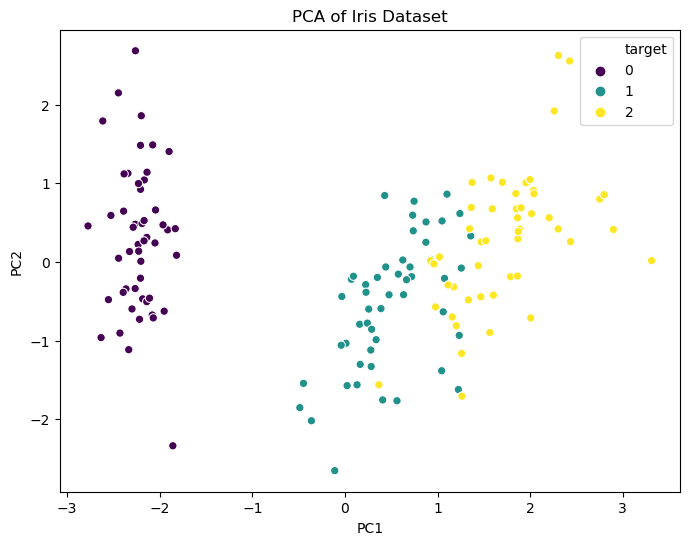

In [41]:
from sklearn.decomposition import PCA

# 1. PCA 객체 생성 (2차원으로 축소)
pca = PCA(n_components=2)

# 2. 데이터에 fit_transform 적용
principal_components = pca.fit_transform(scaled_features)

# 3. 결과를 데이터프레임으로 변환
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['target'] = df['target']

# 설명된 분산 비율 확인
print(f"Explained variance ratio: {pca.explained_variance_ratio_}") # [0.72962445 0.22850762]
print(f"Total explained variance: {sum(pca.explained_variance_ratio_)}") # 0.9581320720000164

# 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=df_pca, palette='viridis')
plt.title('PCA of Iris Dataset')
plt.show()

In [47]:
print(df.iloc[:, :-1].columns)
print(pca.components_)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]


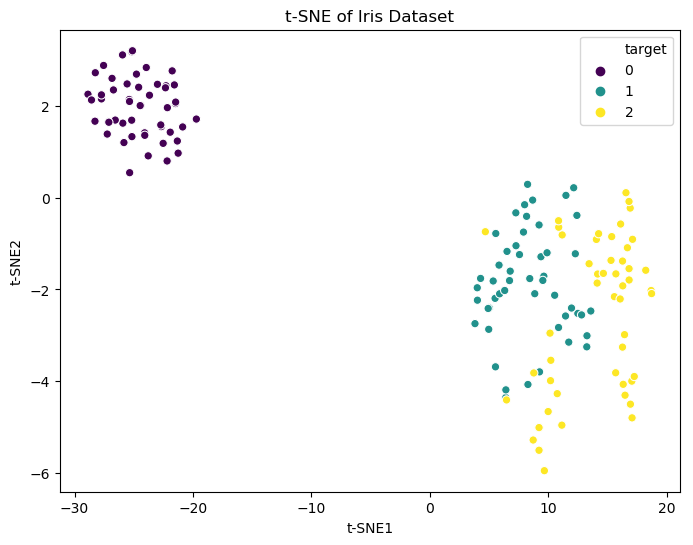

In [48]:
from sklearn.manifold import TSNE

# 1. t-SNE 객체 생성 (2차원으로 축소)
# perplexity: 각 점이 고려하는 이웃의 수. 보통 5~50 사이 값 사용.
tsne = TSNE(n_components=2, perplexity=30, random_state=42)

# 2. 데이터에 fit_transform 적용
tsne_features = tsne.fit_transform(scaled_features)

# 3. 결과를 데이터프레임으로 변환
df_tsne = pd.DataFrame(data=tsne_features, columns=['t-SNE1', 't-SNE2'])
df_tsne['target'] = df['target']

# 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='target', data=df_tsne, palette='viridis')
plt.title('t-SNE of Iris Dataset')
plt.show()

In [54]:
# 파이프라인 예시
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(scaled_features, df['target'])

mask = selector.get_support()
selected_features = df.iloc[:, :-1].columns[mask]
scores = selector.scores_

print("=== SelectKBest 결과 ===")
print("선택된 특징 :", list(selected_features))
print()
print("전체 특징별 점수:")
for feature, score in zip(df.iloc[:, :-1].columns, scores):
    print(f"{feature:20s} : {score:.4f}")

=== SelectKBest 결과 ===
선택된 특징 : ['petal length (cm)', 'petal width (cm)']

전체 특징별 점수:
sepal length (cm)    : 119.2645
sepal width (cm)     : 49.1600
petal length (cm)    : 1180.1612
petal width (cm)     : 960.0071


   petal length (cm)  petal width (cm)
0          -1.340227         -1.315444
1          -1.340227         -1.315444
2          -1.397064         -1.315444
3          -1.283389         -1.315444
4          -1.340227         -1.315444


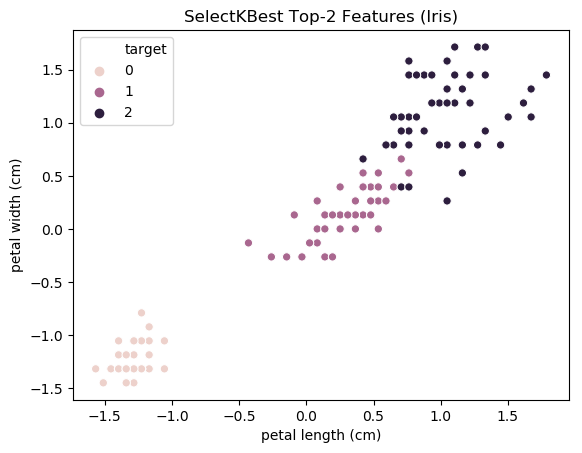

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

df_selected = pd.DataFrame(X_new, columns=selected_features)
print(df_selected.head())

df_plot = df_selected.copy()
df_plot['target'] = df['target']

sns.scatterplot(x=selected_features[0], y=selected_features[1], hue='target', data=df_plot)
plt.title("SelectKBest Top-2 Features (Iris)")
plt.show()